<a href="https://www.kaggle.com/code/kanishk16/normal-equation-linear-regression-from-scratch?scriptVersionId=250871371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


# Step 0. Load the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Step 1.Extract the x and y 

In [3]:
x_values=df["YearsExperience"].values
y_values=df["Salary"].values

# Step 2. Assemble the Design Matrix
We assemble a design matrix to represent our entire system of linear equations in a single, compact matrix equation: y ≈ Xθ.

In [4]:
size=len(y_values)
X = np.c_[np.ones(size),x_values]

# Step 3. Calculate Each values of the Normal Equation (θ = (XᵀX)⁻¹Xᵀy) using NumPy

In [5]:
# Using Normal Equation θ = (XᵀX)⁻¹Xᵀy

# Xᵀ
XT=X.T

# XᵀX
XTX=XT@X

# (XᵀX)⁻¹
from numpy.linalg import inv
XTX_inv=inv(XTX)

# Xᵀy
XTy=XT@y_values

# Step 4. Calculate theta which will have 2 values
- θ₀ (the first value): This is the estimated base salary for someone with zero years of experience.

- θ₁ (the second value): This tells you how much the salary is predicted to increase for each additional year of experience.

In [6]:
theta=XTX_inv@XTy
print(theta)

[24848.20396652  9449.96232146]


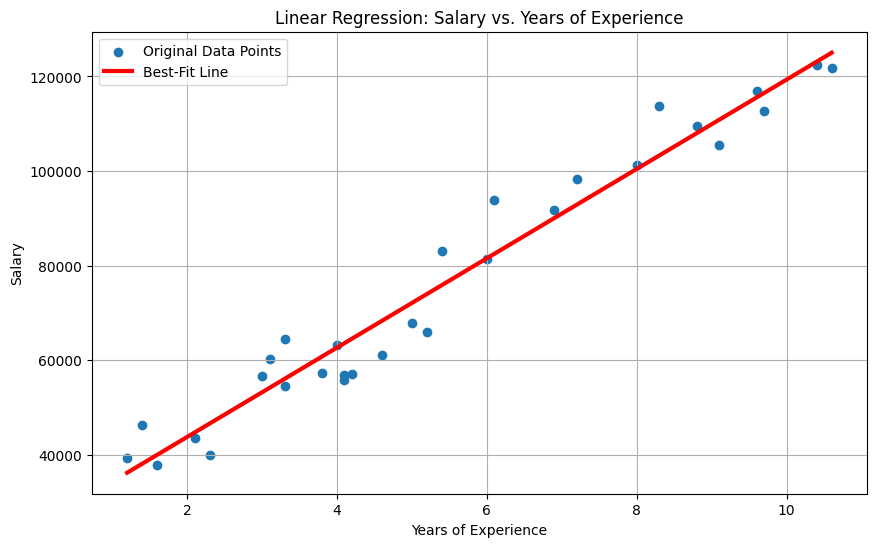

In [7]:
import matplotlib.pyplot as plt
y_predicted = X @ theta

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Original Data Points')
plt.plot(x_values, y_predicted, color='red', linewidth=3, label='Best-Fit Line')


plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.legend()
plt.grid(True)


plt.show()